## Time Gaps (2-14 hours) ##

(linked to Eric Bellm's SCOC 2021 Cadence Note regarding time gaps between 2-14 hours)

Transient and variability studies would prefer a logarithmic distribution of time gaps between visits, in order to study variability on all time scales. The typical cadence on the other hand, tends to place pairs of visits within a night at about 30 minutes separation and then return a few days later. Depending on the details of the cadence (in particular, if rolling cadence is implemented), this internight gap may be longer or shorter, but we do have a dearth of visits in the 2-14 hour timescales usually. 

This notebook looks at the distribution of visits acquired with longer-than-typical-pair intervals, within a night.
The metric itself can be used for any range of times.

In [2]:
import glob
import os

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import healpy as hp
import pandas as pd

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils

from rubin_sim.data import get_baseline

In [3]:
# Create an output directory and connect to the current baseline simulation, available in $RUBIN_SIM_DATA_DIR
outDir = 'temp_tgaps'

dbfile = get_baseline()

runName = os.path.split(dbfile)[-1].replace('.db', '')
opsdb = maf.db.OpsimDatabase(dbfile)

print(runName)

baseline_v2.1_10yrs


In [5]:
# Look at the distribution of tgaps .. a 'big set' of Tgaps metrics for each filter and all filters is in

tgaps_dict  = maf.batches.timeGaps(runName=runName)

list(tgaps_dict.keys())

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


['baseline_v2_1_10yrs_Tgaps_observationStartMJD_all_bands_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_2-14hrs_all_bands_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_1day_all_bands_HEAL',
 'baseline_v2_1_10yrs_Tgaps_observationStartMJD_u_band_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_2-14hrs_u_band_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_1day_u_band_HEAL',
 'baseline_v2_1_10yrs_Tgaps_observationStartMJD_g_band_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_2-14hrs_g_band_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_1day_g_band_HEAL',
 'baseline_v2_1_10yrs_Tgaps_observationStartMJD_r_band_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_2-14hrs_r_band_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_1day_r_band_HEAL',
 'baseline_v2_1_10yrs_Tgaps_observationStartMJD_i_band_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_2-14hrs_i_band_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_1day_i_band_HEAL',
 'baseline_v2_1_10yrs_Tgaps_observationStartMJD_z_band_HEAL',
 'baseline_v2_1_10yrs_TgapsPercent_2-14hrs_z_band_HEAL',
 'basel

In [6]:
resultsDb = maf.db.ResultsDb(outDir)

g = maf.MetricBundleGroup(tgaps_dict, opsdb, outDir=outDir, resultsDb=resultsDb)
g.runAll()

Querying table None with no constraint for columns ['fieldDec', 'rotSkyPos', 'observationStartMJD', 'fieldRA'].
Found 2081749 visits
Running:  ['baseline_v2_1_10yrs_Tgaps_observationStartMJD_all_bands_HEAL', 'baseline_v2_1_10yrs_TgapsPercent_2-14hrs_all_bands_HEAL', 'baseline_v2_1_10yrs_TgapsPercent_1day_all_bands_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter = "g" for columns ['fieldDec', 'rotSkyPos', 'observationStartMJD', 'fieldRA']
Found 214824 visits
Running:  ['baseline_v2_1_10yrs_Tgaps_observationStartMJD_g_band_HEAL', 'baseline_v2_1_10yrs_TgapsPercent_2-14hrs_g_band_HEAL', 'baseline_v2_1_10yrs_TgapsPercent_1day_g_band_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter = "r" for columns ['fieldDec', 'rotSkyPos', 'observationStartMJD', 'fieldRA']
Found 466186 visits
Running:  ['baseline_v2_1_10yr

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


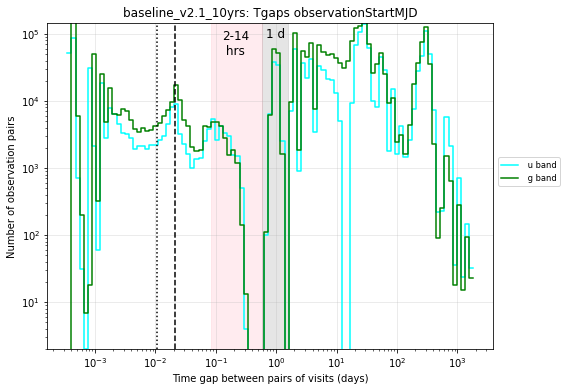

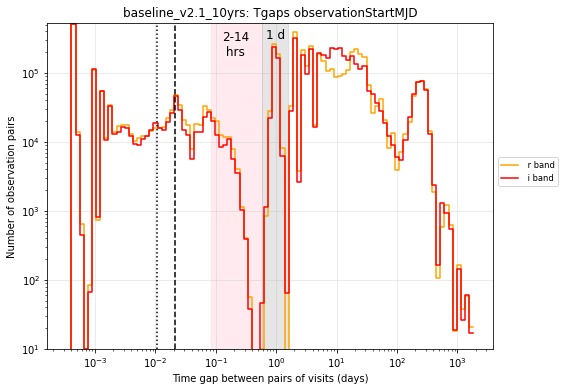

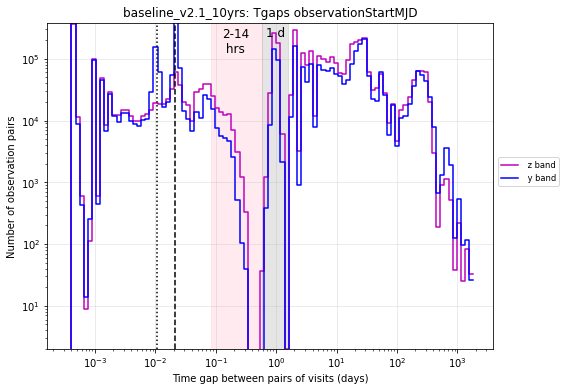

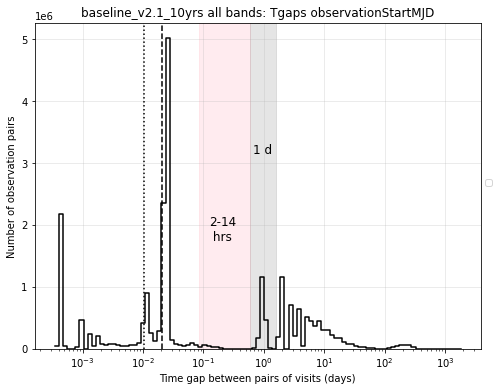

In [17]:
# Plot all of the TGaps metric results (with summary histogram)
# Plot them in sets of two filters for more readable plots
for filtersets in (['u_band', 'g_band'], ['r_band', 'i_band'], ['z_band', 'y_band'], ['all_bands', 'filler']):
    ph = maf.PlotHandler(outDir=outDir, figformat='png', thumbnail=False)
    tgaps = []
    for t in tgaps_dict:
        if 'Tgaps_observation' in t:
            if filtersets[0] in t or filtersets[1] in t:
                tgaps.append(tgaps_dict[t])
    ph.setMetricBundles(tgaps)
    plotDict = {'xscale': 'log', 'yMin': 0, 'figsize': (8, 6), 
                'ylabel': 'Number of observation pairs', 
                'xlabel': 'Time gap between pairs of visits (days)',
                'yscale': 'log',
                'legendloc': (1.01, 0.5)}
    if filtersets[0] == 'all_bands':
        plotDict['yscale'] = None
    ph.plot(plotFunc=maf.SummaryHistogram(), plotDicts=plotDict)

    y1, y2 = plt.ylim()
    plt.fill_between([2/24, 14/24], y1=y1, y2=y2, color='pink', alpha=0.3)
    plt.fill_between([14/24, 38/24], y1=y1, y2=y2, color='grey', alpha=0.2)
    plt.axvline(30/60/24, linestyle='--', color='k')
    plt.axvline(15/60/24, linestyle=':', color='k')
    plt.text(3/24., (y2+y1)*1.0/3., '2-14\n hrs', fontsize='large')
    plt.text(16/24., (y2+y1)*1.8/3, '1 d', fontsize='large')

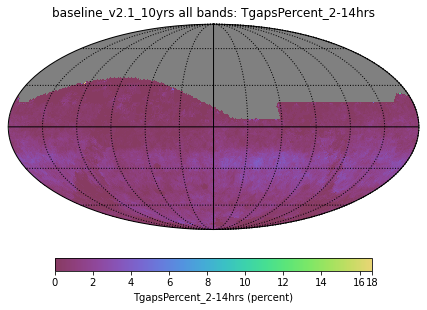

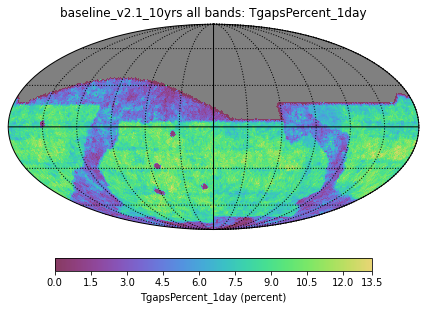

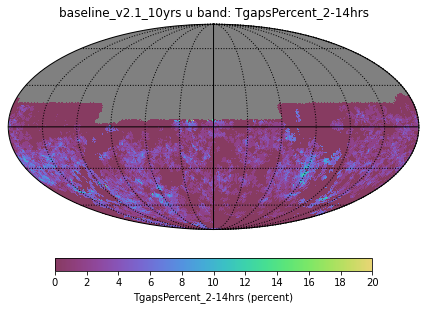

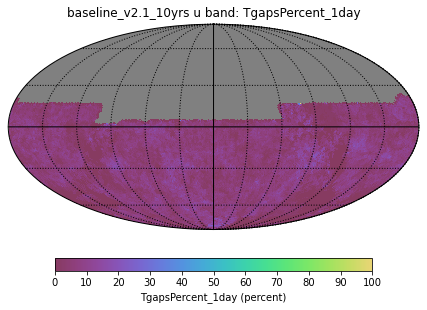

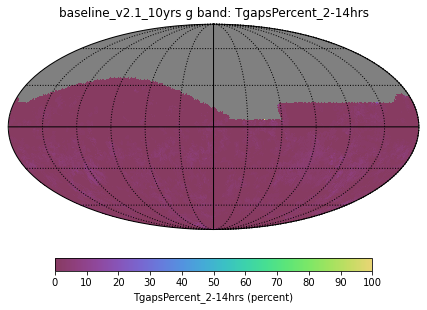

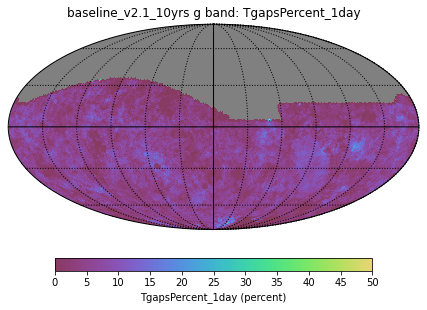

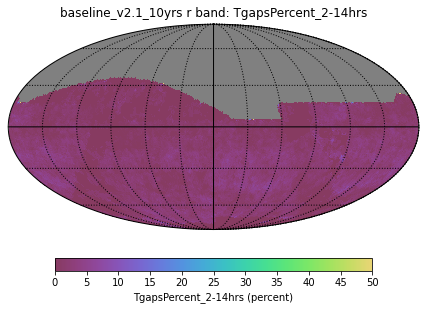

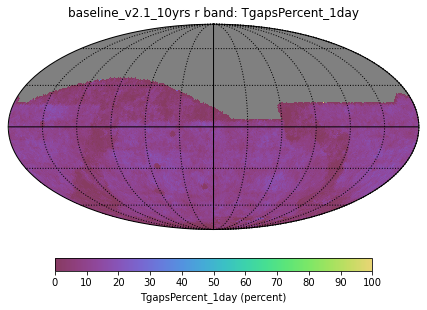

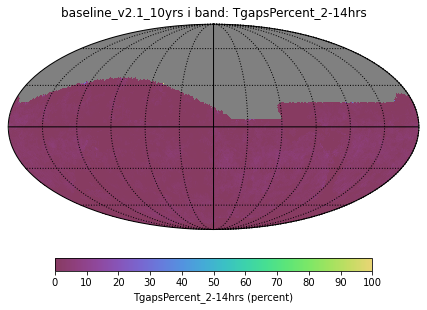

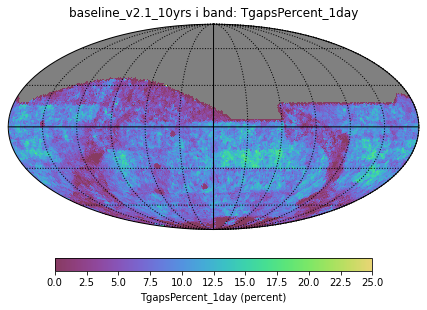

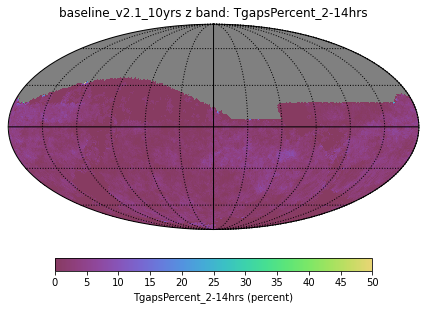

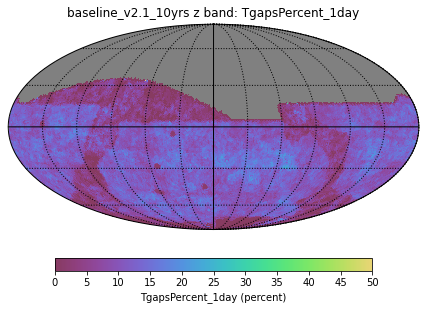

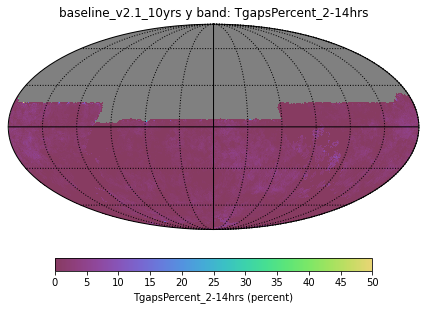

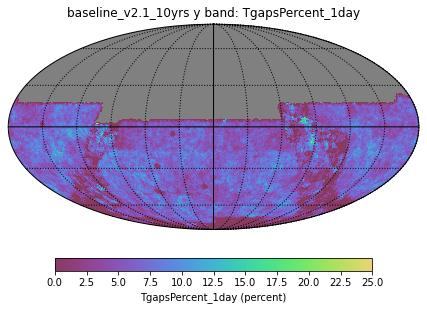

In [18]:
# We could look at the TGapsPercent values across the sky to see if they change significantly
tperc = []
for t in tgaps_dict:
    if 'TgapsPercent' in t:
        tperc.append(tgaps_dict[t])

for t in tperc:
    ph.setMetricBundles([t])
    ph.plot(plotFunc=maf.HealpixSkyMap())

/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 1095 bins, returning 200
  warnings.warn(
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 425 bins, returning 200
  warnings.warn(
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 818 bins, returning 200
  warnings.warn(
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 300 bins, returning 200
  warnings.warn(
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 597 bins, returning 200
  warnings.warn(
/Users/lynnej/lsst_repos/rubin_sim/rubin_sim/maf/utils/mafUtils.py:141: UserWarning: Optimal bin calculation tried to make 265 bins, returning 200
  warnings.warn(
/Users/lynnej/l

2

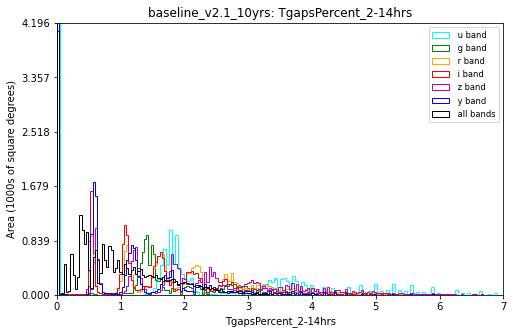

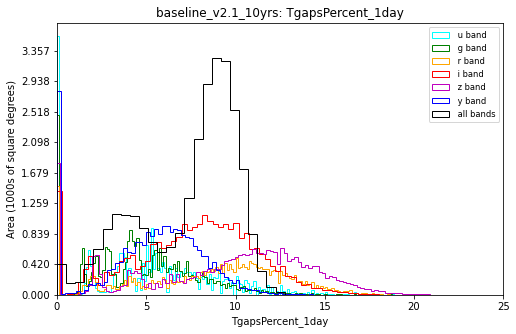

In [19]:
tperc = []
for t in tgaps_dict:
    if 'TgapsPercent_2-14hrs' in t:
        tperc.append(tgaps_dict[t])
        
ph.setMetricBundles(tperc)
plotDict = {'figsize':(8, 5), 'xMin': 0, 'xMax': 7, 'yMax': 5000}
ph.plot(plotFunc=maf.HealpixHistogram(), plotDicts=plotDict)

tperc = []
for t in tgaps_dict:
    if 'TgapsPercent_1day' in t:
        tperc.append(tgaps_dict[t])
        
ph.setMetricBundles(tperc)
plotDict = {'figsize': (8,5), 'xMin': 0, 'xMax': 25}
ph.plot(plotFunc=maf.HealpixHistogram(), plotDicts=plotDict)

In [21]:
# And we can also look at the summary statistics from each of the TGapsPercent metrics
tperc = []
for t in tgaps_dict:
    if 'TgapsPercent' in t:
        tperc.append(tgaps_dict[t])

pd.DataFrame([t.summaryValues for t in tperc], index=[f"{t.info_label} \
                            {t.metric.name.replace('TgapsPercent_', '')}" for t in tperc])

,Mean,Rms,Median,Max,Min,N(+3Sigma),N(-3Sigma),Count,25th%ile,75th%ile
all bands 2-14hrs,0.930669,0.743105,0.807382,16.666667,0.0,121,0,33575,0.378788,1.393728
all bands 1day,7.392408,2.765915,8.333333,13.214286,0.0,0,0,33575,5.179283,9.459459
u band 2-14hrs,1.471669,1.905813,0.000000,20.000000,0.0,305,0,29734,0.000000,2.083333
u band 1day,5.522473,3.721411,5.405405,100.000000,0.0,122,0,29734,3.278689,7.843137
g band 2-14hrs,0.844839,1.318361,0.000000,100.000000,0.0,275,0,33420,0.000000,1.470588
g band 1day,4.965007,3.043398,4.615385,50.000000,0.0,187,0,33420,2.777778,6.849315
r band 2-14hrs,1.606206,1.439217,1.578947,50.000000,0.0,115,0,33489,0.512821,2.409639
r band 1day,8.732750,4.148261,9.411765,100.000000,0.0,4,0,33489,6.000000,11.640212
i band 2-14hrs,1.225357,1.306761,1.081081,100.000000,0.0,97,0,33477,0.000000,1.970443
i band 1day,7.608126,3.514017,7.978723,25.000000,0.0,12,0,33477,5.418719,10.052910


## Compare with another simulation ## 

This could be extended to work with multiple simulations, but adding even one additional simulation demonstrates the effect.

In [27]:
dbfile = '/Users/lynnej/opsim/v2.0/noroll_v2.0_10yrs.db'
runName = os.path.split(dbfile)[-1].replace('.db', '')
opsdb = maf.db.OpsimDatabase(dbfile)

print(runName)

noroll_v2.0_10yrs


In [28]:
tgaps_dict2 = maf.batches.timeGaps(runName=runName)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [29]:
g = maf.MetricBundleGroup(tgaps_dict2, opsdb, outDir=outDir, resultsDb=resultsDb)
g.runAll()

Querying table None with no constraint for columns ['fieldDec', 'rotSkyPos', 'observationStartMJD', 'fieldRA'].
Found 2083375 visits
Running:  ['noroll_v2_0_10yrs_Tgaps_observationStartMJD_all_bands_HEAL', 'noroll_v2_0_10yrs_TgapsPercent_2-14hrs_all_bands_HEAL', 'noroll_v2_0_10yrs_TgapsPercent_1day_all_bands_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter = "g" for columns ['fieldDec', 'rotSkyPos', 'observationStartMJD', 'fieldRA']
Found 218007 visits
Running:  ['noroll_v2_0_10yrs_Tgaps_observationStartMJD_g_band_HEAL', 'noroll_v2_0_10yrs_TgapsPercent_2-14hrs_g_band_HEAL', 'noroll_v2_0_10yrs_TgapsPercent_1day_g_band_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying table None with constraint filter = "r" for columns ['fieldDec', 'rotSkyPos', 'observationStartMJD', 'fieldRA']
Found 463840 visits
Running:  ['noroll_v2_0_10yrs_Tgaps_observ

Text(0.6666666666666666, 3159019.08, '1 d')

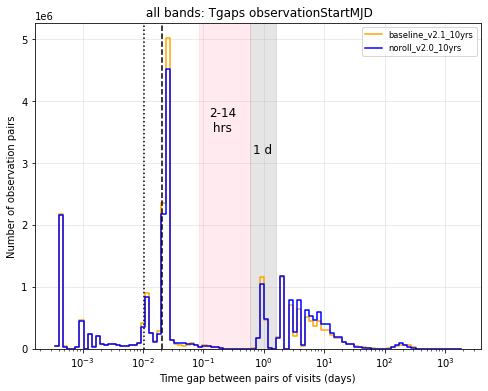

In [37]:
# And plot both of the summary histograms of the tgaps together
ph = maf.PlotHandler(outDir=outDir, thumbnail=False, savefig=False)

# just the 'all' bands
tgaps = []
for t in tgaps_dict:
    if 'Tgaps_observation' in t and 'all_bands' in t:
        tgaps.append(tgaps_dict[t])
for t in tgaps_dict2:
    if 'Tgaps_observation' in t and 'all_bands' in t:
        tgaps.append(tgaps_dict2[t])

ph.setMetricBundles(tgaps)
plotDicts = [{'color': 'orange'}, {'color': 'blue', 'figsize': (8, 5)}]
ph.plot(plotFunc=maf.SummaryHistogram(), plotDicts=plotDicts)

y1, y2 = plt.ylim()
plt.fill_between([2/24, 14/24], y1=y1, y2=y2, color='pink', alpha=0.3)
plt.fill_between([14/24, 38/24], y1=y1, y2=y2, color='grey', alpha=0.2)
plt.axvline(30/60/24, linestyle='--', color='k')
plt.axvline(15/60/24, linestyle=':', color='k')
plt.text(3/24., (y2+y1)*2/3., '2-14\n hrs', fontsize='large')
plt.text(16/24., (y2+y1)*1.8/3, '1 d', fontsize='large')

In [38]:
# And we can also look at the summary statistics from each of the TGapsPercent metrics
tperc = []
for t in tgaps_dict2:
    if 'TgapsPercent' in t:
        tperc.append(tgaps_dict2[t])

pd.DataFrame([t.summaryValues for t in tperc], index=[f"{t.info_label} \
                            {t.metric.name.replace('TgapsPercent_', '')}" for t in tperc])

,Mean,Rms,Median,Max,Min,N(+3Sigma),N(-3Sigma),Count,25th%ile,75th%ile
all bands 2-14hrs,0.918179,0.709398,0.803213,12.500000,0.0,155,0,33688,0.390625,1.326900
all bands 1day,7.037024,2.461317,7.710843,14.285714,0.0,0,0,33688,5.274502,8.896797
u band 2-14hrs,1.275093,1.843487,0.000000,50.000000,0.0,390,0,30324,0.000000,1.923077
u band 1day,5.122670,3.790388,5.000000,100.000000,0.0,171,0,30324,1.960784,7.407407
g band 2-14hrs,0.626557,1.018111,0.000000,7.462687,0.0,518,0,33544,0.000000,1.351351
g band 1day,4.219691,2.880841,4.081633,33.333333,0.0,159,0,33544,2.127660,6.060606
r band 2-14hrs,1.080603,1.046929,1.058201,25.000000,0.0,283,0,33607,0.000000,1.694915
r band 1day,6.941593,3.199321,7.272727,20.000000,0.0,6,0,33607,4.918033,9.183673
i band 2-14hrs,0.932432,0.964060,0.581395,25.000000,0.0,377,0,33610,0.000000,1.570681
i band 1day,5.372855,2.669353,5.405405,33.333333,0.0,70,0,33610,3.703704,7.142857
